Задача

В соответствии с действующими в США регуляциями, публичные компании должны раскрывать информацию об определенных типах корпоративных событий в систему EDGAR, где они доступны для публичного анализа, в том числе профессиональными участниками рынка ценных бумаг. Различные типа событий категоризированы в системе в виде различных форм, при этом разные типы форм имеют разную степень машинной читаемости. В рамках тестового задания, вам предстоит провести первичный анализ информации доступной в системе, как с количественной так и с качественной точек зрения.

I. Определите наиболее удобный способ программно получать список поданных за день форм, автоматизируйте процесс загрузки данных и подготовки их для анализа.

II. Проведите анализ частотности форм за первый квартал 2021 года: постройте таблицы как числа форм каждого конкретного типа, так и числа компаний по которым подана хоть одна форма каждого типа. По топ-10 наиболее популярным формам, постройте графики этих величин в зависимости от дня квартала.

III. Разбейте топ-10 наиболее часто встречающихся форм на четыре группы, по степени машинной читаемости (низкая/высокая) и по важности с точки зрения нахождения справедливой цены компании (низкая/высокая). Опишите своими словами, что заставило вас категоризировать каждый тип формы таким образом.

Пункты I-II можно оформлять и как python скрипт, и как юпитер-ноутбук.

Решение

# 1

Программно получать данные удобно используя различные библиотеки, например secedgar, как предложено ниже. Код ниже я запускал в в пайчарме, установив все нужные библиотеки, так что код ниже здесь работать не будет. 

In [ ]:
from datetime import date
from secedgar import ComboFilings

combo_filings = ComboFilings(start_date=date(2021, 10, 1),
                             end_date=date(2021, 10, 2),user_agent='andrew.romanenkov@gmail.com')
combo_filings.save('/daily')

# 2

In [ ]:
from google.colab import drive #подключаем библиотеку для работы с google диском
drive.mount('/content/drive') #монтируем google диск

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

#Открыть квартальный файл и считать его построчно

#Файл скачан отсюда
#https://www.sec.gov/Archives/edgar/full-index/2021/QTR1/company.idx
#И сохранен на гугл диск

cname = []
rtype= []
day=[]

with open('/content/drive/My Drive/synthesis/2021Q1.txt', 'r') as file:
    for line in file:
        cname.append(line[:62].strip())
        rtype.append(line[62:74].strip())
        day.append(line[86:96].strip())

#Создадим датафрейм

header = 10
data = {'company_name': cname[header:], 'report_type': rtype[header:], 'day': day[header:]}
df = pd.DataFrame(data)

Построим таблицу с числами форм каждого типа

In [ ]:
res1 = df.groupby('report_type').count().sort_values(by='company_name',ascending=False)

In [ ]:
res1

,company_name,day
report_type,,
4,133902,133902
SC 13G/A,27474,27474
424B2,23001,23001
8-K,18499,18499
3,14643,14643
...,...,...
S-4MEF,1,1
NT 10-Q/A,1,1
S-B/A,1,1


Построим таблицу с числом компаний, по которым подана хотя бы одна заявка каждого типа

In [ ]:
res2 = df.pivot_table(values='company_name', index='report_type',  aggfunc=pd.Series.nunique)

In [ ]:
res2 = res2.sort_values(by='company_name',ascending=False)[:10]

In [ ]:
res2

,company_name
report_type,
4,38814
3,9303
D,9031
SC 13G/A,6912
8-K,5944
13F-HR,5874
10-K,5437
D/A,5360
SC 13G,4650


Подготовим данные и нарисуем график количества форм 4 по дням квартала

In [ ]:
res3 = df[df['report_type'] == '4'].groupby('day').count()

In [ ]:
res3

,company_name,report_type
day,,
2021-01-04,2845,2845
2021-01-05,6615,6615
2021-01-06,4089,4089
2021-01-07,1036,1036
2021-01-08,1286,1286
...,...,...
2021-03-25,1037,1037
2021-03-26,1244,1244
2021-03-29,1225,1225


<BarContainer object of 61 artists>

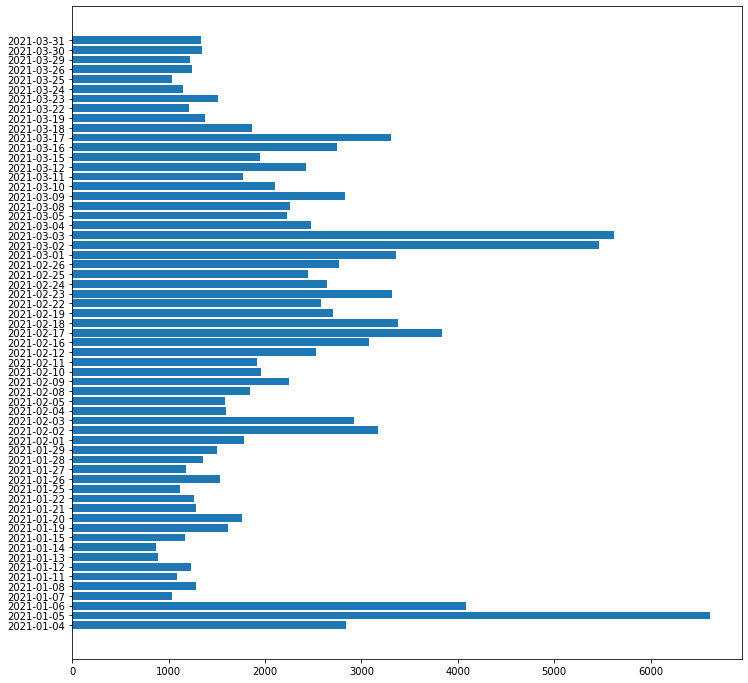

In [ ]:
plt.figure(figsize=(12, 12))
plt.barh(res3.index,res3.company_name)

Аналогично можно изобразить кол-во остальных форм по дням

# 3

# Важность отчетов

Группа 4 по важности (высокая)

***8-K*** Раскрывает существенные события или информацию, которую компания выбирает или обязана обнародовать до следующего запланированного ежеквартального или годового отчета -- очень важный отчет, важнее квартального и годового

***4*** Раскрытие информации о сделках с долевыми ценными бумагами компании в течение двух рабочих дней с момента совершения сделки -- также один из самых важных отчетов, от действий основных держателей зависит настроение рынка

Группа 3 по важности

***SC-13G*** Подается, когда сторона приобретает более пяти процентов зарегистрированных голосующих ценных бумаг компании в качестве пассивного инвестирования -- не очень понял, но интуитивно отнес в эту группу

Группа 2 по важности -- здесь ежеквартальные

***3*** Первоначальный отчет о владении долевыми ценными бумагами компании 

***13F-HR*** Управляющие институциональными инвестициями ежеквартально раскрывают информацию о своих активах и любых изменениях в них.

***10-Q*** Предоставляет неаудированные квартальные финансовые отчеты, обновленную информацию о существенных рисках, с которыми сталкивается компания, а также обсуждение и анализ руководством результатов деятельности компании за предыдущий финансовый квартал.

Группа 1 по важности (низкая) -- здесь ежегодные


***D*** Уведомление об освобождении от налогообложения размещении ценных бумаг

***5*** - Годовой отчет о владении долевыми ценными бумагами компании.

***10-K*** Предоставляет аудированную годовую финансовую отчетность, обсуждение существенных факторов риска для компании и ее бизнеса, а также обсуждение и анализ руководством результатов деятельности компании за предыдущий финансовый год.


# Машиночитаемость отчетов


В принципе, есть сервис sec-api.io, и данные по любому отчету можно получать сразу в JSON или преобразовывать их в JSON после, так что имеем, что XBRL-отчеты можно отнести к сложночитаемым, а остальные читаются проще. Пример получения отчетов ниже

In [ ]:
from sec_api import QueryApi

queryApi = QueryApi(api_key="YOUR_API_KEY")

query = {
  "query": { "query_string": { 
      "query": "ticker:TSLA AND filedAt:{2020-01-01 TO 2020-12-31} AND formType:\"10-Q\"" 
    } },
  "from": "0",
  "size": "10",
  "sort": [{ "filedAt": { "order": "desc" } }]
}

filings = queryApi.get_filings(query)

print(filings)